In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("listings.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,129.0,30,2,2016-05-15,0.01,1,174,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.097410,-118.344940,Private room,87.0,30,44,2024-12-01,0.34,2,365,4,NaN
2,2732,Zen Life at the Beach,3041,Louise-Diane,Other Cities,Santa Monica,34.004670,-118.480500,Private room,139.0,7,24,2022-08-21,0.15,2,323,0,228269
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.874900,-118.115150,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
4,6033,Poolside Serenity Studio,11619,Sarah,City of Los Angeles,Woodland Hills,34.168870,-118.644780,Entire home/apt,NaN,30,20,2020-03-22,0.11,7,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46616,1304484478483184182,"SM Upper 2BD/1BA, w/AC & Laundry",137877395,Nina,Other Cities,Santa Monica,34.035414,-118.480882,Entire home/apt,150.0,31,0,NaN,NaN,69,365,0,NaN
46617,1304490474929131005,cozy private room,665422057,Alejandra,Unincorporated Areas,Hacienda Heights,34.004631,-117.971291,Private room,48.0,1,0,NaN,NaN,1,365,0,NaN
46618,1304496059402915411,Quiet Queen Room Perfect for Budget Travelers,520601947,Frank,Unincorporated Areas,Hacienda Heights,33.996720,-117.967089,Private room,36.0,1,0,NaN,NaN,13,365,0,NaN
46619,1304503772175890310,"# Private room, Spacious&wide N",364730549,Moon,Other Cities,Artesia,33.863487,-118.076166,Private room,57.0,3,0,NaN,NaN,2,358,0,NaN


In [3]:
df.shape

(46621, 18)

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
df.count()

id                                46621
name                              46620
host_id                           46621
host_name                         46612
neighbourhood_group               46621
neighbourhood                     46621
latitude                          46621
longitude                         46621
room_type                         46621
price                             38340
minimum_nights                    46621
number_of_reviews                 46621
last_review                       33854
reviews_per_month                 33854
calculated_host_listings_count    46621
availability_365                  46621
number_of_reviews_ltm             46621
license                           13266
dtype: int64

In [6]:
df.isnull().sum() # missing values in each columns

id                                    0
name                                  1
host_id                               0
host_name                             9
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              8281
minimum_nights                        0
number_of_reviews                     0
last_review                       12767
reviews_per_month                 12767
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           33355
dtype: int64

In [7]:
# Calculate percentage of missing values
print("\nPercentage of missing values:")
perc = round(df.isnull().sum() / len(df), 2) * 100

# Filter and display columns with missing values
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
price                18.0
last_review          27.0
reviews_per_month    27.0
license              72.0
dtype: float64


In [8]:
df = df.drop(columns=["license"])

In [9]:
# Moderate and high missing values (> 20%)
df["last_review"] = df["last_review"].fillna("Not available")
df["host_name"] = df["host_name"].fillna("Host wanted to remain unknown")

In [10]:
df['reviews_per_month'] = df['reviews_per_month'].replace('[\no review available]', '', regex=True).astype(float)

In [11]:
# low missing values (<20%)``
df['price'] = df['price'].fillna(df['price'].median())
df["name"] = df["name"].fillna("Mystery location") #(only one missing value)



In [12]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,129.0,30,2,2016-05-15,0.01,1,174,0
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.097410,-118.344940,Private room,87.0,30,44,2024-12-01,0.34,2,365,4
2,2732,Zen Life at the Beach,3041,Louise-Diane,Other Cities,Santa Monica,34.004670,-118.480500,Private room,139.0,7,24,2022-08-21,0.15,2,323,0
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.874900,-118.115150,Entire home/apt,150.0,30,0,Not available,NaN,1,0,0
4,6033,Poolside Serenity Studio,11619,Sarah,City of Los Angeles,Woodland Hills,34.168870,-118.644780,Entire home/apt,150.0,30,20,2020-03-22,0.11,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46616,1304484478483184182,"SM Upper 2BD/1BA, w/AC & Laundry",137877395,Nina,Other Cities,Santa Monica,34.035414,-118.480882,Entire home/apt,150.0,31,0,Not available,NaN,69,365,0
46617,1304490474929131005,cozy private room,665422057,Alejandra,Unincorporated Areas,Hacienda Heights,34.004631,-117.971291,Private room,48.0,1,0,Not available,NaN,1,365,0
46618,1304496059402915411,Quiet Queen Room Perfect for Budget Travelers,520601947,Frank,Unincorporated Areas,Hacienda Heights,33.996720,-117.967089,Private room,36.0,1,0,Not available,NaN,13,365,0
46619,1304503772175890310,"# Private room, Spacious&wide N",364730549,Moon,Other Cities,Artesia,33.863487,-118.076166,Private room,57.0,3,0,Not available,NaN,2,358,0


In [13]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 12767
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [14]:
%pip install geopandas contextily

Note: you may need to restart the kernel to use updated packages.


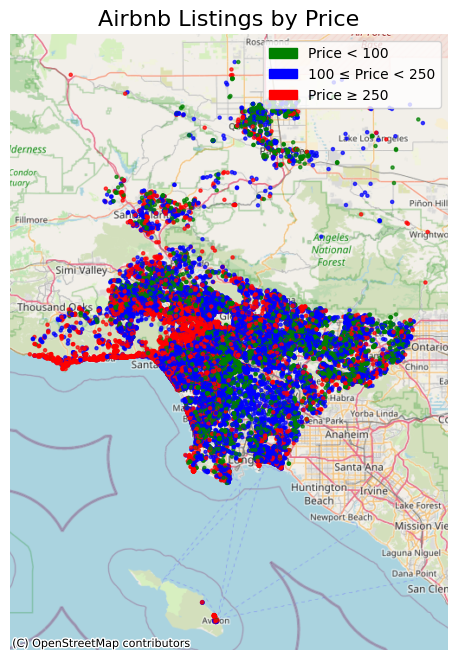

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import matplotlib.patches as mpatches


# Convert latitude and longitude into Point geometries
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Assign colors based on price
gdf['color'] = gdf['price'].apply(lambda p: 'green' if p < 100 else 'blue' if p < 250 else 'red')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

legend_patches = [
    mpatches.Patch(color='green', label='Price < 100'),
    mpatches.Patch(color='blue', label='100 ≤ Price < 250'),
    mpatches.Patch(color='red', label='Price ≥ 250')
]
ax.legend(handles=legend_patches, loc='upper right')


ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()

In [16]:
df.price.describe()

count    46621.000000
mean       256.807833
std        786.739683
min          6.000000
25%        104.000000
50%        150.000000
75%        215.000000
max      99999.000000
Name: price, dtype: float64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

print("\nOutlier prices:")
print(outliers['price'].describe())

#  Remove outliers
listings_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Number of outliers in 'price': 5077

Outlier prices:
count     5077.000000
mean      1139.863896
std       2183.189200
min        382.000000
25%        475.000000
50%        655.000000
75%       1095.000000
max      99999.000000
Name: price, dtype: float64


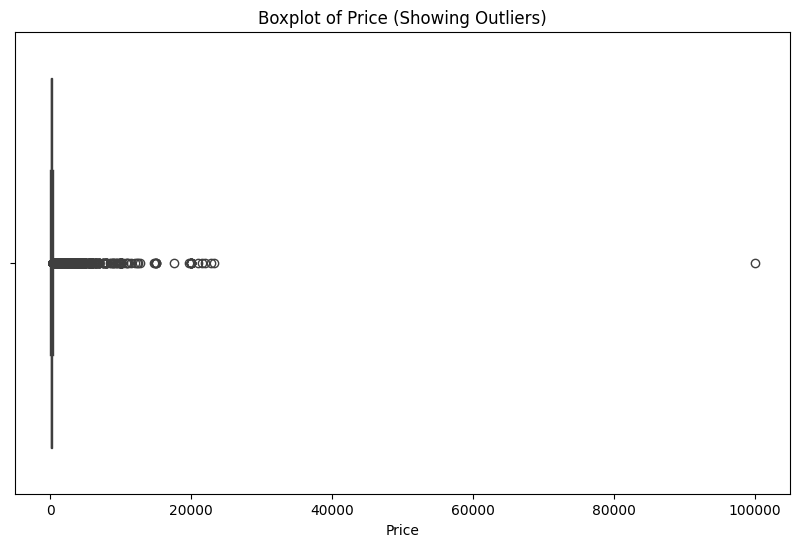

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

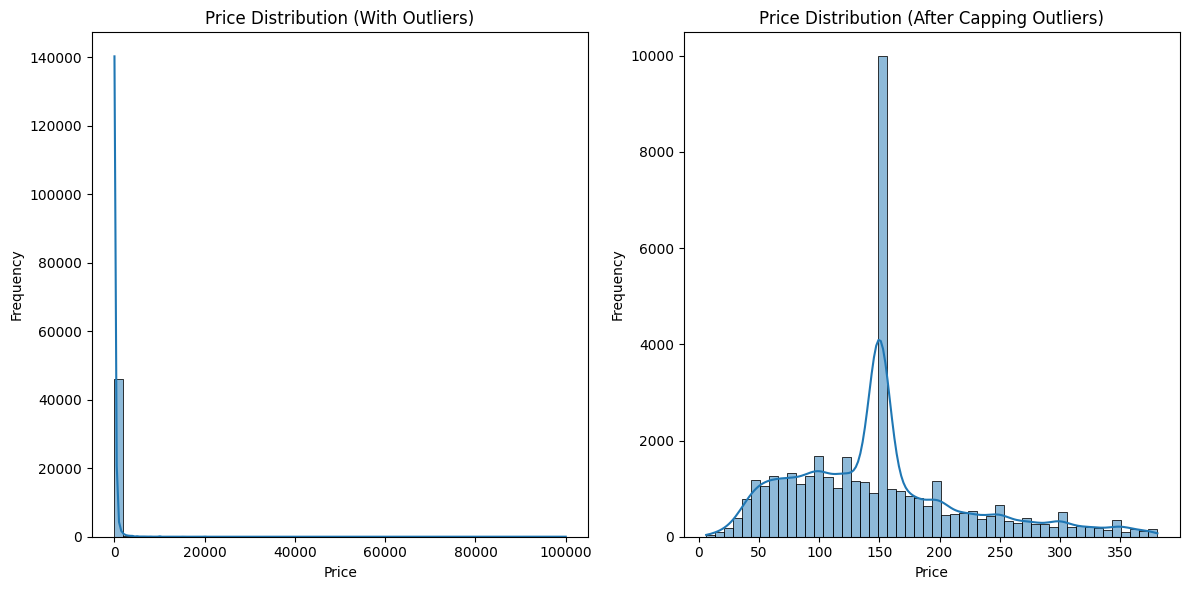

In [19]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

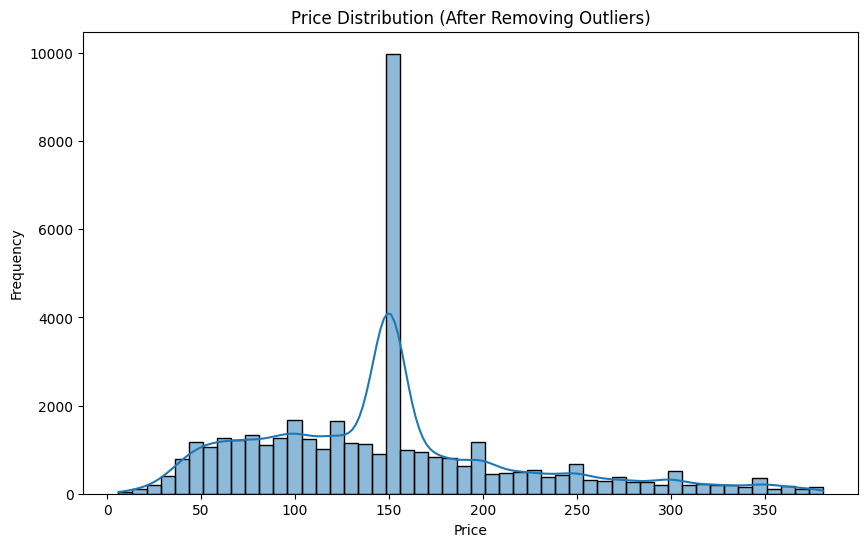

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

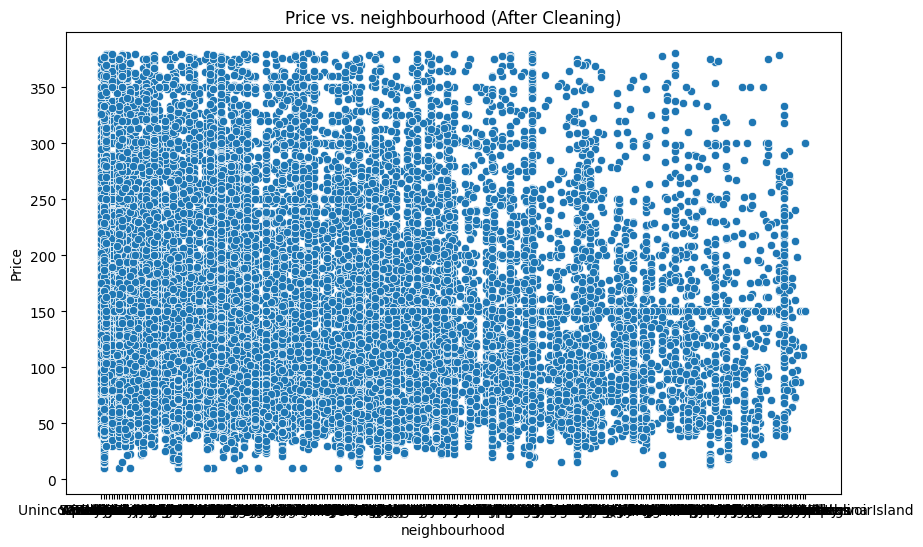

In [21]:
# Price vs. neighbourhood
plt.figure(figsize=(10, 6))
sns.scatterplot(x='neighbourhood', y='price', data=listings_cleaned)
plt.title('Price vs. neighbourhood (After Cleaning)')
plt.xlabel('neighbourhood')
plt.ylabel('Price')
plt.show()

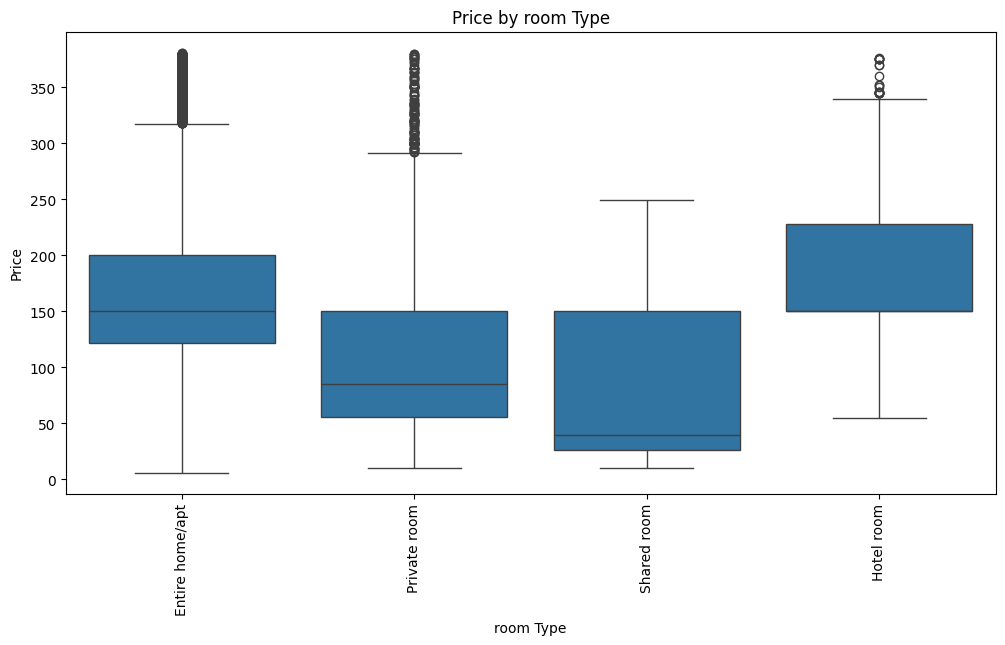

In [22]:
# Price by room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by room Type')
plt.xlabel('room Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()



In [23]:
import numpy as np

def calculate_bins(data, method='sturges'):
    """
    Calculate the number of bins for a histogram based on the specified method.

    Parameters:
        data (array-like): The dataset for which bins are to be calculated.
        method (str): The method to use for calculating bins. Options are:
                      - 'sturges' (default): Sturges' Rule
                      - 'sqrt': Square Root Rule
                      - 'fd': Freedman-Diaconis Rule

    Returns:
        int: The number of bins.
    """
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [24]:
sbins       = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins   = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins     = calculate_bins(listings_cleaned.price , method = 'fd')

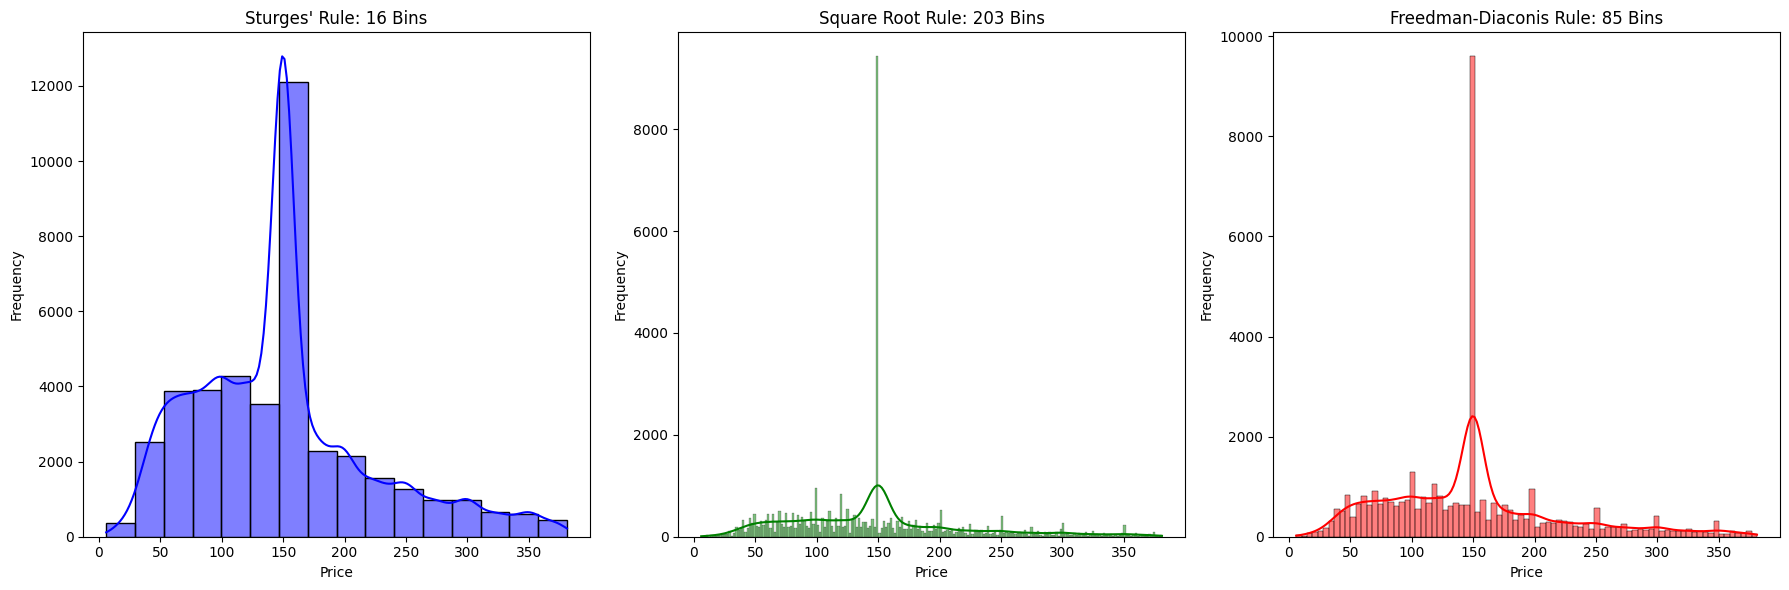

In [25]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

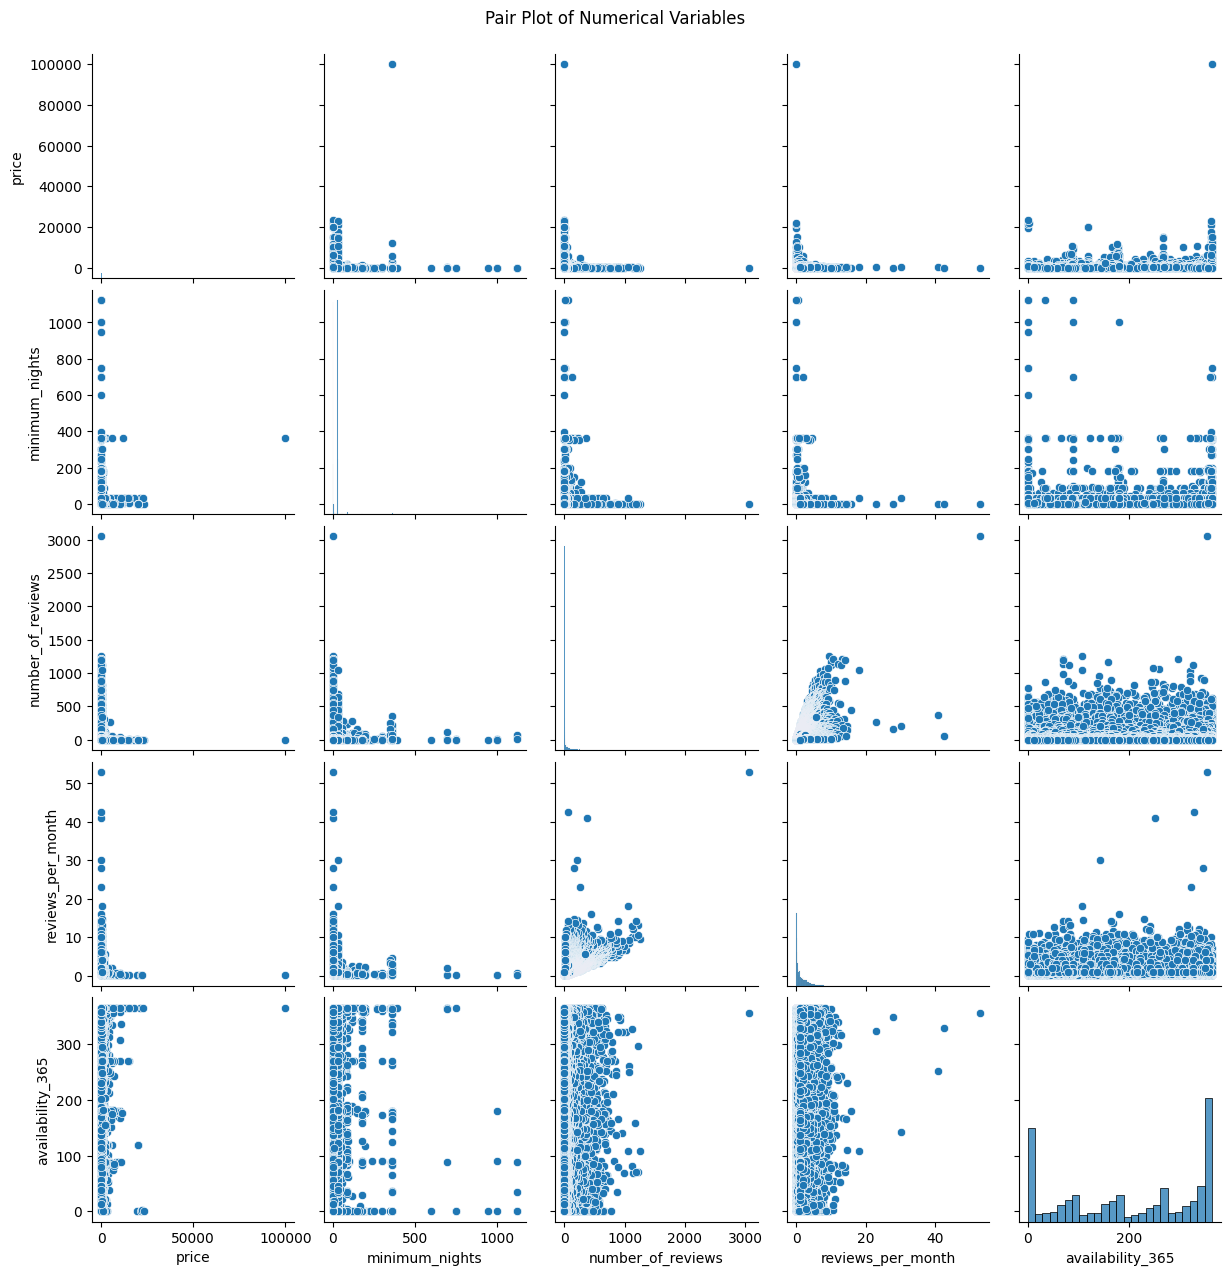

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

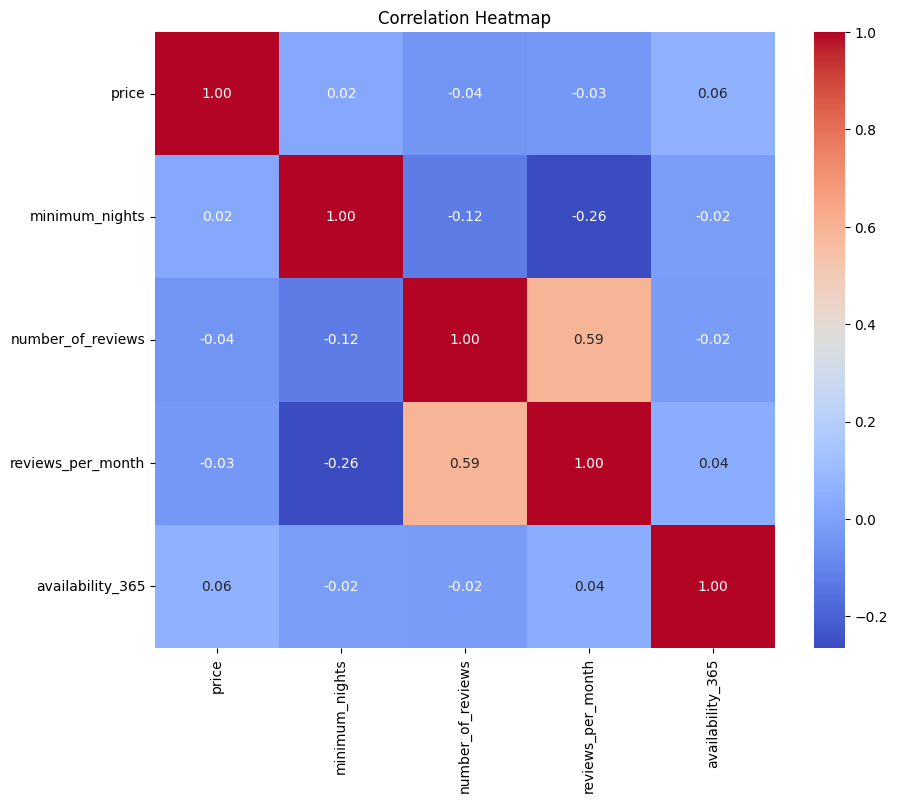

In [27]:
# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

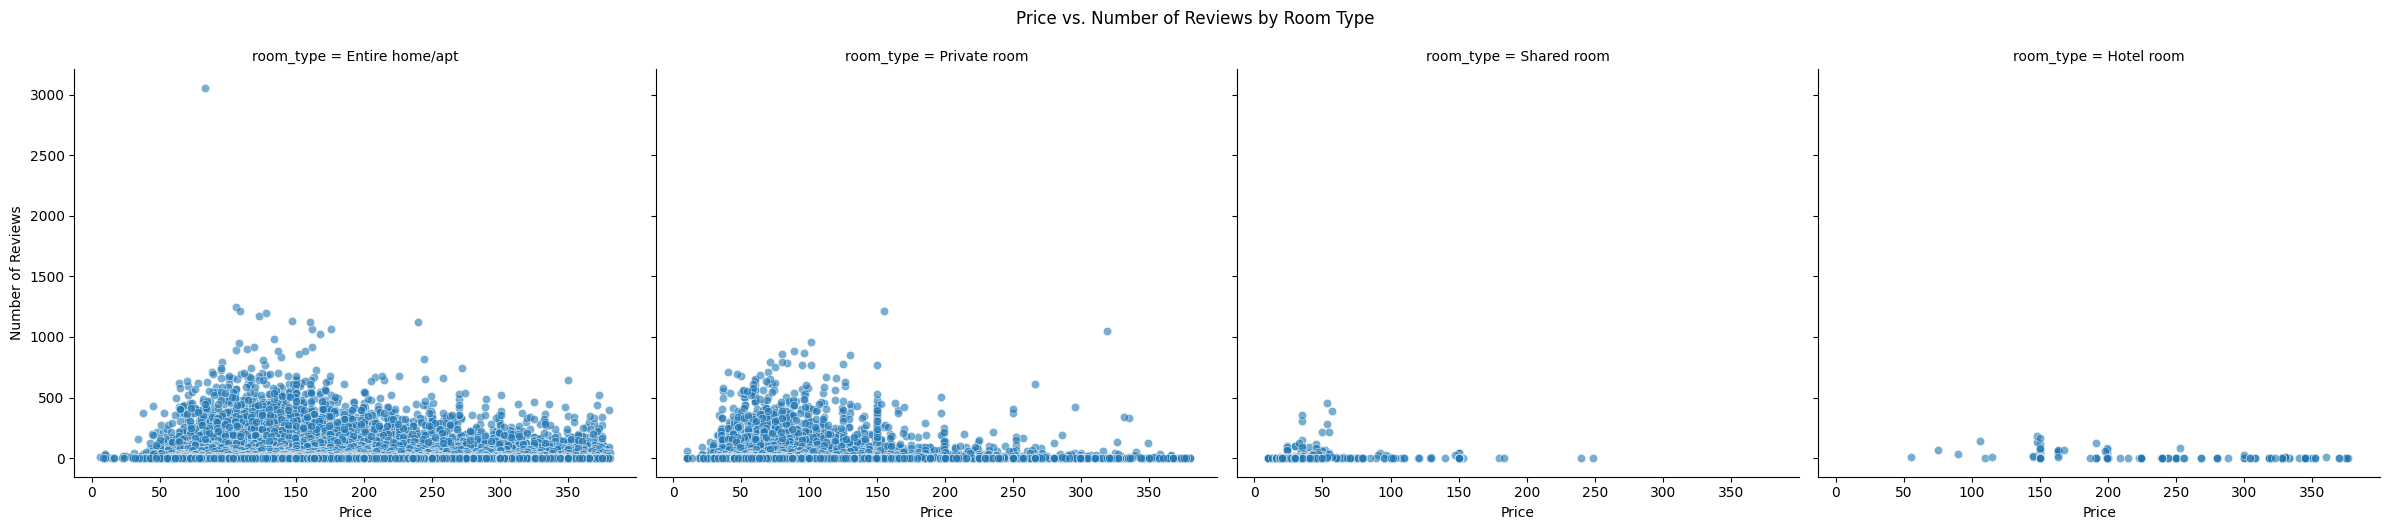

In [28]:
# Faceted scatter plot: Price vs. Number of Reviews, faceted by Room Type
g = sns.FacetGrid(listings_cleaned, col='room_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'price', 'number_of_reviews', alpha=0.6)
g.set_axis_labels('Price', 'Number of Reviews')
g.fig.suptitle('Price vs. Number of Reviews by Room Type', y=1.05)
plt.show()